In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist_784_csv.csv')

In [3]:
print(df.shape)

(70000, 785)


In [4]:
print(df.columns)

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)


In [5]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [6]:
data = df.values
print(df.shape)
print(type(data))

(70000, 785)
<class 'numpy.ndarray'>


In [7]:
x = data[:, :784]
print(x.shape)
print(x)

(70000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
y = data[:, 784]
print(y.shape)
print(y)

(70000,)
[5 0 4 ... 4 5 6]


In [9]:
# train test split
split = int(0.8 * x.shape[0])
print(split)

56000


In [10]:
x_train = x[:split, :]
y_train = y[:split]

In [11]:
x_test = x[split:, :]
y_test = y[split:]

In [12]:
print(x_train.shape, y_train.shape)

(56000, 784) (56000,)


In [13]:
print(x_test.shape, y_test.shape)

(14000, 784) (14000,)


In [14]:
# visualize some samples
def drawImage(sample):
    # reshape that image
    img = sample.reshape((28,28),)
    plt.imshow(img, cmap='gray')
    plt.show()

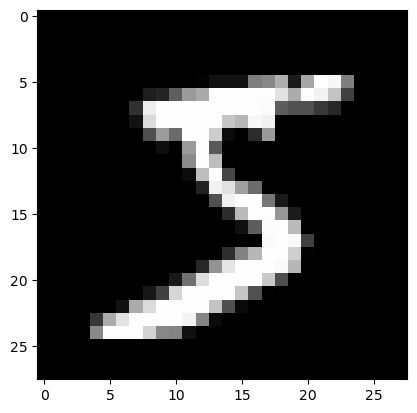

5


In [15]:
drawImage(x_train[0])
print(y_train[0])

In [22]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint, k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    print(index)
    pred = new_vals[0][index]
    print(pred)
    return pred

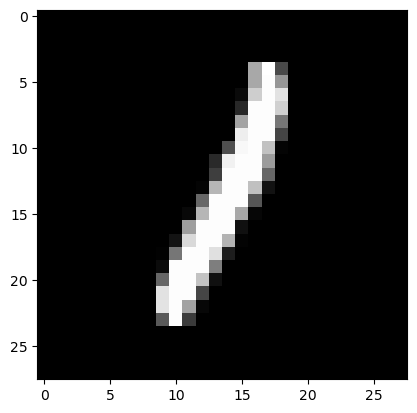

[[373.66696402   1.        ]
 [389.87433873   1.        ]
 [411.26998432   1.        ]
 [431.12643157   1.        ]
 [448.93540738   1.        ]]
(array([1.]), array([5], dtype=int64))
0


In [21]:
# make predictions over test images
drawImage(x_test[25])
pred = knn(x_train, y_train, x_test[25])

In [18]:
pred

1.0

In [19]:
print(y_test[25])

1
